In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Data 26.11.2023..xlsx')
df.head(10)
area_counts = df['area'].value_counts()
mask = df['area'].map(area_counts) >= 10
df = df[mask]
df.head(10)

True     586
False     14
Name: area, dtype: int64


,area,sq_meters,room_number,price,heating,floor,total_floors
0,Opština Čukarica,95 m2,3.0,750€,Gas,2,2.0
1,Opština Novi Beograd,40 m2,1.5,400€,CG,1,5.0
2,Opština Novi Beograd,68 m2,3.0,1.400€,CG,7,7.0
3,Opština Vračar,84 m2,3.0,700€,CG,1,5.0
4,Opština Novi Beograd,40 m2,1.0,900€,CG,17,NaN
5,Opština Novi Beograd,75 m2,3.0,600€,CG,VPR,4.0
6,Opština Savski venac,54 m2,2.0,800€,TA,5,5.0
7,Opština Stari grad,50 m2,2.0,950€,CG,6,NaN
8,Opština Novi Beograd,80 m2,3.0,1.050€,CG,7,8.0
9,Opština Voždovac,50 m2,2.0,350€,NaN,4,NaN


In [282]:
df = df.dropna(subset=['area'])
df['price'] = df['price'].str.replace('€', '').str.replace('.', '')
df['sq_meters'] = df['sq_meters'].str.replace(' m2', '').str.replace(',', '.')
df['room_number'] = df['room_number'].str.replace('+', '')
df['floor'] = df['floor'].replace({'PSUT' : 0, 'PR' : 0, 'VPR' : 0, 'SUT' : 0}) #['PSUT', 'PR', 'VPR'], 0, inplace=True
df[['price', 'sq_meters', 'room_number', 'floor']] = df[['price', 'sq_meters', 'room_number', 'floor']].astype(float)
df['area'] = df['area'].astype(str)
df['area'] = df['area'].str.replace('Opština ', '')
df = df.sort_values(by=['price'], ignore_index=True)
df = df.dropna()
df.describe()

C:\Users\marko\AppData\Local\Temp/ipykernel_27436/3338150887.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('€', '').str.replace('.', '')
C:\Users\marko\AppData\Local\Temp/ipykernel_27436/3338150887.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['room_number'] = df['room_number'].str.replace('+', '')


,sq_meters,room_number,price,floor,total_floors
count,473.000000,473.000000,473.000000,473.000000,473.000000
mean,62.146237,2.295983,802.122622,2.968288,6.331924
std,27.103845,0.895566,346.698731,3.052689,4.480392
min,15.000000,0.500000,250.000000,0.000000,1.000000
25%,45.000000,2.000000,500.000000,1.000000,4.000000
50%,60.000000,2.000000,750.000000,2.000000,5.000000
75%,72.000000,3.000000,1100.000000,4.000000,7.000000
max,320.000000,5.000000,1500.000000,24.000000,30.000000


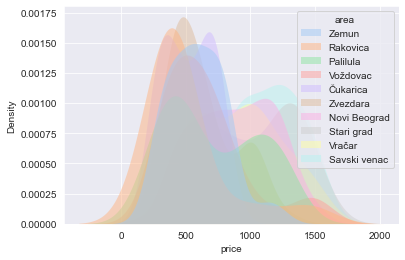

In [283]:
# Distribution check per area
sns.set_style("darkgrid")
sns.set_palette("pastel")

sns.kdeplot(
    data = df,
    x = df['price'],
    hue=df['area'],
    fill=True, 
    common_norm=False, 
    palette="pastel",
    alpha=.5, 
    linewidth=0,
)
plt.show()

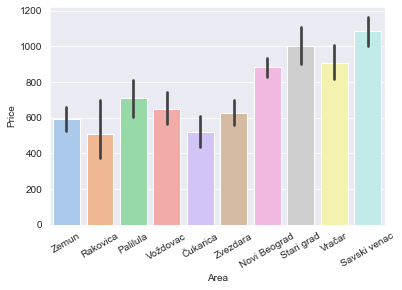

In [284]:
# Mean price per area
sns.barplot(
    data= df,
    x = df['area'],
    y = df['price'],
)
plt.xlabel('Area')
plt.ylabel('Price')
plt.xticks(rotation = 30)
plt.show()

array([[<AxesSubplot:title={'center':'sq_meters'}>,
        <AxesSubplot:title={'center':'room_number'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'total_floors'}>, <AxesSubplot:>]],
      dtype=object)

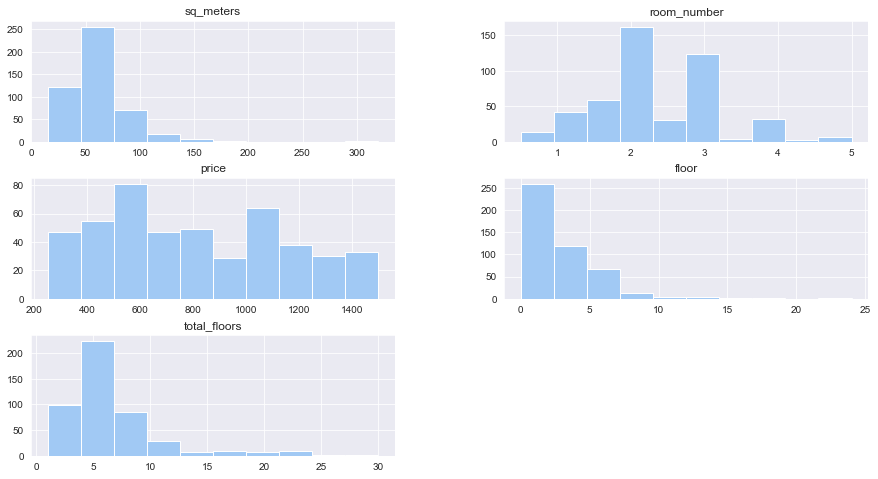

In [285]:
df.hist(figsize=(15, 8))

In [286]:
heating_counts = df['heating'].value_counts()
mask = df['heating'].map(heating_counts) >= 16
df = df[mask]

<AxesSubplot:>

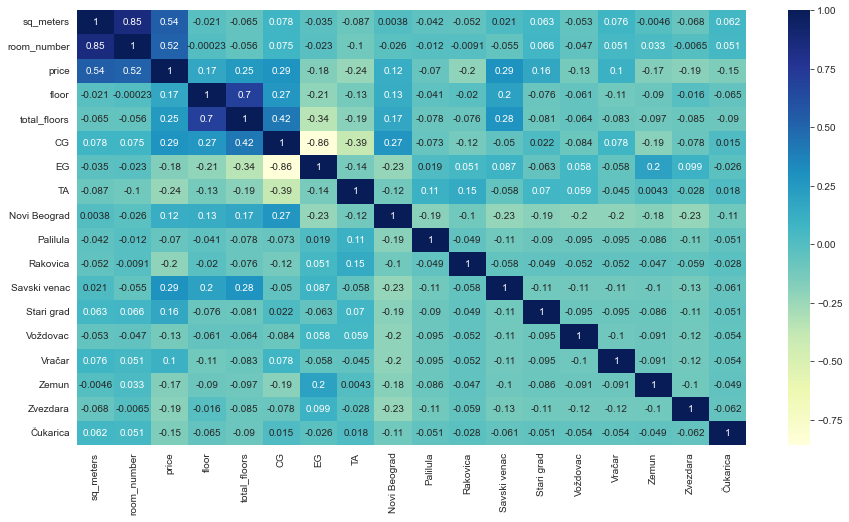

In [287]:
df = df.join(pd.get_dummies(df.heating)).drop(['heating'], axis=1)
df = df.join(pd.get_dummies(df.area)).drop(['area'], axis = 1)
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [288]:
df.to_excel("Processed data 26.11.2023..xlsx", index=False)